In [ ]:
#Description : Sentiment analysis program that parses the tweets fetched from Twitter 
               #On va essayer de prédire si un tweet parle de désastre ou non

#Load the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# save filepath to variable for easier access
disaster_file_path = '/content/drive/MyDrive/Fouille/MonProjet/train.csv'
# read the data and store data in DataFrame Disaster_data
disaster_data = pd.read_csv(disaster_file_path)


In [ ]:
print(disaster_data.shape) #nombre de ligne et colonne de mon dataset

(7613, 5)


Valeurs total null de notre dataset :
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


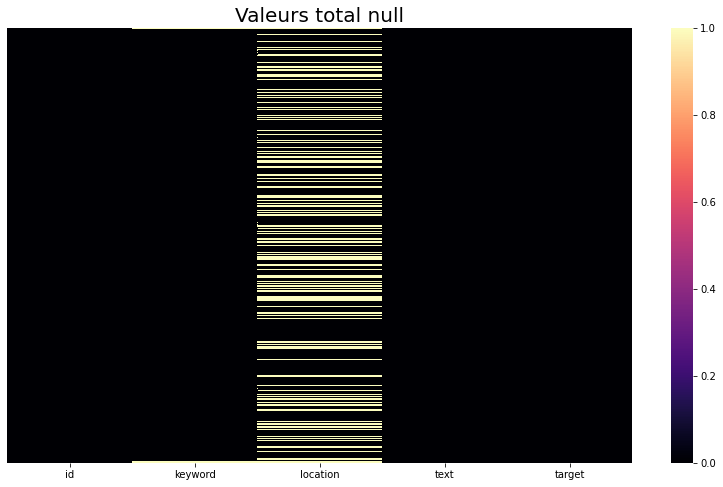

In [ ]:
from termcolor import cprint
import matplotlib.pyplot as plt
import seaborn as sns

cprint('Valeurs total null de notre dataset :','green')
print(disaster_data.isnull().sum()) # trouver les valeurs null du dataset

plt.figure(figsize=(14,8))

# visualiser les valeurs null
sns.heatmap(disaster_data.isnull(), yticklabels = False, cmap='magma')
plt.title('Valeurs total null',size=20);

In [ ]:
#Creation d'un Dataframe avec random 
dataframe_tweets = disaster_data.sample(7613, random_state=1).copy()
#Nombre de tweets Réels vs tweets Non_réel 
print(dataframe_tweets['target'].value_counts()) 

0    4342
1    3271
Name: target, dtype: int64


In [ ]:
#afficahe des deux class tweets_réel ou tweets_non réel
tweets_class_0, tweets_class_1 = dataframe_tweets["target"].value_counts()
print("tweets Negatifs :",tweets_class_0, "--- vs --- tweets Positifs",tweets_class_1)

tweets Negatifs : 4342 --- vs --- tweets Positifs 3271


In [ ]:
tweets_class_ratio = tweets_class_0 / tweets_class_1
print("Ratio tweets (Non_réel/réel) = {0:.3f}".format(tweets_class_ratio))

Ratio tweets (Non_réel/réel) = 1.327


In [ ]:
#Exploration de la colonne cible Regardons à quoi ressemblent les tweets en cas de catastrophe et non en cas de catastrophe
#1-tweets en cas de catastrophe
disaster_tweets = dataframe_tweets[dataframe_tweets['target']==1]['text']
disaster_tweets.values[16]

'#Philippines Former Township fire truck being used in Philippines: \x89Û_  of emergency equipment in Cebu Philippi...  http://t.co/aL28RVkqPQ'

In [ ]:
#2-Tweet pas en cas de catastrophe
non_disaster_tweets = dataframe_tweets[dataframe_tweets['target']==0]['text']
non_disaster_tweets.values[14]

"If you have an opinion and you don't put it on thh internet you will furst into flames."

In [ ]:
#Avec ces deux simples phrases on remarque qu'il y'a des fautes d'orthographes et des mots incomplet 

In [ ]:
#Vérifiant combien de fois est-ce-que le mot disaster est présent des les tweets peut être que cela mous permettra de classer les tweets dans leurs categorie respectives
dataframe_tweets.loc[dataframe_tweets['text'].str.contains('disaster', na=False, case=False)].target.value_counts()

1    102
0     40
Name: target, dtype: int64

In [ ]:
#Je remarque que la fréquence de présence du mot n'est pas considérable, j'ignore donc cette information 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 20 artists>

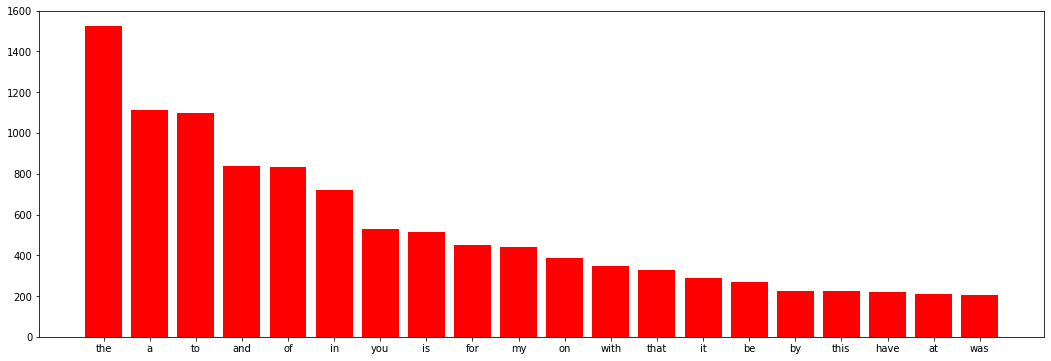

In [ ]:
#Mots vides courants dans les tweets
import nltk
nltk.download('stopwords')

import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import defaultdict
stop = set(stopwords.words('english'))

def create_corpus(target):
    corpus=[]
    
    for x in dataframe_tweets[dataframe_tweets['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

def create_corpus_df(tweet, target):
    corpus=[]
    
    for x in dataframe_tweets[dataframe_tweets['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus


#Part 1 : Analysez les tweets de la classe 0.
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top_0=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20]

#Top 20 des mots vides de classe 0 (pas de vrais tweets de catastrophe)
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top_0)
plt.bar(x,y,color='red')

<BarContainer object of 20 artists>

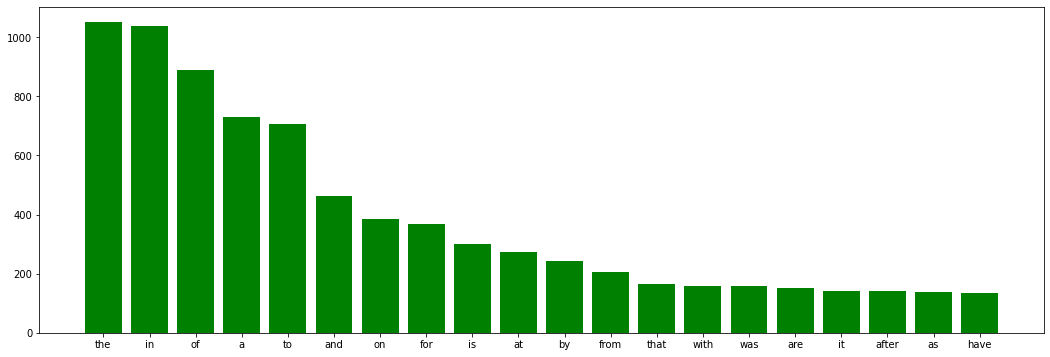

In [ ]:
#Partie 2 : Analyser les tweets avec la classe 1.
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top_1=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 
    
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x,y=zip(*top_1)
plt.bar(x,y,color='green')

In [ ]:
#On remarque donc que la quantité de mot vide de sens est significatif je vais donc les supprimer car ils influance pas l'analyse vu qu'il sont dépourvu de tous sentiment

<BarContainer object of 18 artists>

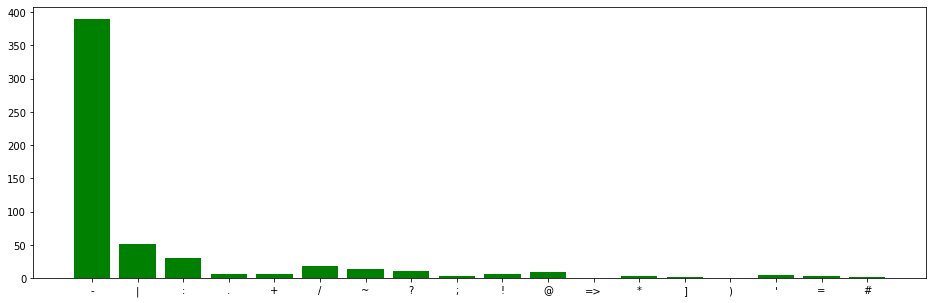

In [ ]:
#Analyse de la ponctuation
import string

#Pour la class 1 : Real Disaster Tweets
plt.figure(figsize=(16,5))
corpus=create_corpus(1)

dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

<BarContainer object of 20 artists>

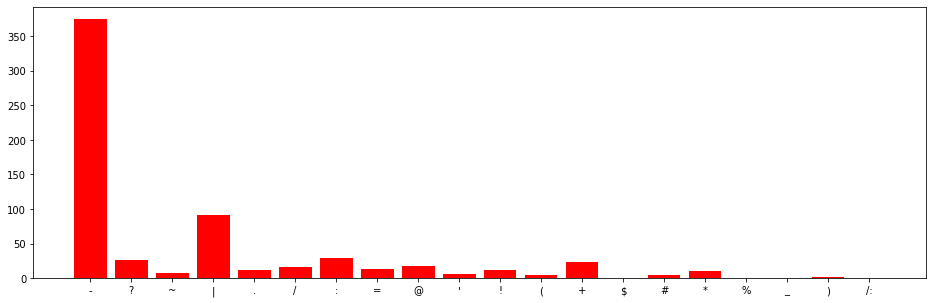

In [ ]:
#Pour la class 0 : Not Real Disaster Tweets
plt.figure(figsize=(16,5))
corpus=create_corpus(0)
dic=defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='red')

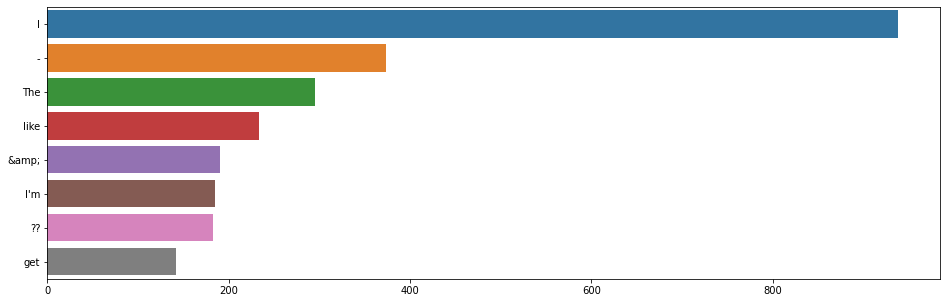

In [ ]:
#Mots communs dans tous les tweets
from collections import Counter

plt.figure(figsize=(16,5))
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

In [ ]:
#On remarque que se soit la poctiation ou les mot vide ou encore des imoji tout cela est présents et c'est des informations sans sens et ils doivent pas être présent lors de notre analyse
#Le dataset a besoin donc de beaucoup de nettoyage

In [ ]:
#affichage des 10 premier tweet positifs format text (pour afficher l'integralité des messages contenu dans chaque tweets réels)
for c in dataframe_tweets[dataframe_tweets["target"] == 1]["text"].head(10):
    print(c)

Goulburn man Henry Van Bilsen missing: Emergency services are searching for a Goulburn man who disappeared from hisÛ_ http://t.co/z99pKJzTRp
Crawling in my skin
These wounds they will not hea
Hollywood Movie About Trapped Miners Released in Chile: 'The 33' Hollywood movie about trapped miners starring... http://t.co/tyyfG4qQvM
The Catastrophic Effects of Hiroshima and Nagasaki Atomic Bombings Still Being Felt Today http://t.co/WC8AqXeDF7
Witness video shows car explode behind burning buildings on 2nd St this afternoon #Manchester  http://t.co/cgmJlSEYLo via @MikeCroninWMUR
Sweetpea's are running riot at the allotment - and brightening up a rainy day http://t.co/6NdBFOPK5m
After a violent afternoon storm more severe weather heads for Chicago tonight. Details ----&gt; http://t.co/6Peeip4y7W
I just added 'Sandy First Responders Lost Their Homes' to VIP Home Page Group on @Vimeo: https://t.co/lKXi6UXjaQ
#NJTurnpike å_ #NJTurnpike Reopens Hours After Truck Fire In? http://t.co/oABJZtbVyZ h

In [ ]:
#Preprocessing
#1- je vais tout mettre en Minuscule
import re

def preprocessing_dataset(tweet):

    
    #Suppression des URLs
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)

    #Supression des crochets
    tweet = re.sub('\[.*?\]', '', tweet)

    #Suppression des tags HTML 
    tweet = re.sub('<.*?>+', '', tweet)

    #Suppression des \n 
    tweet = re.sub('\n', '', tweet)

    #Supression des nombre
    tweet = re.sub('\w*\d\w*', '', tweet)

    tweet = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", tweet)
    tweet = re.sub(r"(\s\-\s|-$)", "", tweet)
    tweet = re.sub(r"[,\!\?\%\(\)\/\"]", "", tweet)
    tweet = re.sub(r"\&\S*\s", "", tweet)
    tweet = re.sub(r"\&", "", tweet)
    tweet = re.sub(r"\+", "", tweet)
    tweet = re.sub(r"\#", "", tweet)
    tweet = re.sub(r"\$", "", tweet)
    tweet = re.sub(r"\£", "", tweet)
    tweet = re.sub(r"\%", "", tweet)
    tweet = re.sub(r"\:", "", tweet)
    tweet = re.sub(r"\@\S+", "", tweet)
    tweet = re.sub(r"\-", "", tweet)
    tweet = re.sub(r"\.", "", tweet)
    
    #characters spéciaux
    tweet = re.sub(r"\x89Û_", "", tweet)
    tweet = re.sub(r"\x89ÛÒ", "", tweet)
    tweet = re.sub(r"\x89ÛÓ", "", tweet)
    tweet = re.sub(r"\x89ÛÏWhen", "When", tweet)
    tweet = re.sub(r"\x89ÛÏ", "", tweet)
    tweet = re.sub(r"China\x89Ûªs", "China's", tweet)
    tweet = re.sub(r"let\x89Ûªs", "let's", tweet)
    tweet = re.sub(r"\x89Û÷", "", tweet)
    tweet = re.sub(r"\x89Ûª", "", tweet)
    tweet = re.sub(r"\x89Û\x9d", "", tweet)
    tweet = re.sub(r"å_", "", tweet)
    tweet = re.sub(r"\x89Û¢", "", tweet)
    tweet = re.sub(r"\x89Û¢åÊ", "", tweet)
    tweet = re.sub(r"fromåÊwounds", "from wounds", tweet)
    tweet = re.sub(r"åÊ", "", tweet)
    tweet = re.sub(r"åÈ", "", tweet)
    tweet = re.sub(r"JapÌ_n", "Japan", tweet)    
    tweet = re.sub(r"Ì©", "e", tweet)
    tweet = re.sub(r"å¨", "", tweet)
    tweet = re.sub(r"SuruÌ¤", "Suruc", tweet)
    tweet = re.sub(r"åÇ", "", tweet)
    tweet = re.sub(r"å£3million", "3 million", tweet)
    tweet = re.sub(r"åÀ", "", tweet)

    # Contractions
    tweet = re.sub(r"he's", "he is", tweet)
    tweet = re.sub(r"there's", "there is", tweet)
    tweet = re.sub(r"We're", "We are", tweet)
    tweet = re.sub(r"That's", "That is", tweet)
    tweet = re.sub(r"won't", "will not", tweet)
    tweet = re.sub(r"they're", "they are", tweet)
    tweet = re.sub(r"Can't", "Cannot", tweet)
    tweet = re.sub(r"wasn't", "was not", tweet)
    tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
    tweet = re.sub(r"aren't", "are not", tweet)
    tweet = re.sub(r"isn't", "is not", tweet)
    tweet = re.sub(r"What's", "What is", tweet)
    tweet = re.sub(r"haven't", "have not", tweet)
    tweet = re.sub(r"hasn't", "has not", tweet)
    tweet = re.sub(r"There's", "There is", tweet)
    tweet = re.sub(r"He's", "He is", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"You're", "You are", tweet)
    tweet = re.sub(r"I'M", "I am", tweet)
    tweet = re.sub(r"shouldn't", "should not", tweet)
    tweet = re.sub(r"wouldn't", "would not", tweet)
    tweet = re.sub(r"i'm", "I am", tweet)
    tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
    tweet = re.sub(r"I'm", "I am", tweet)
    tweet = re.sub(r"Isn't", "is not", tweet)
    tweet = re.sub(r"Here's", "Here is", tweet)
    tweet = re.sub(r"you've", "you have", tweet)
    tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
    tweet = re.sub(r"we're", "we are", tweet)
    tweet = re.sub(r"what's", "what is", tweet)
    tweet = re.sub(r"couldn't", "could not", tweet)
    tweet = re.sub(r"we've", "we have", tweet)
    tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
    tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
    tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
    tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
    tweet = re.sub(r"who's", "who is", tweet)
    tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
    tweet = re.sub(r"y'all", "you all", tweet)
    tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
    tweet = re.sub(r"would've", "would have", tweet)
    tweet = re.sub(r"it'll", "it will", tweet)
    tweet = re.sub(r"we'll", "we will", tweet)
    tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
    tweet = re.sub(r"We've", "We have", tweet)
    tweet = re.sub(r"he'll", "he will", tweet)
    tweet = re.sub(r"Y'all", "You all", tweet)
    tweet = re.sub(r"Weren't", "Were not", tweet)
    tweet = re.sub(r"Didn't", "Did not", tweet)
    tweet = re.sub(r"they'll", "they will", tweet)
    tweet = re.sub(r"they'd", "they would", tweet)
    tweet = re.sub(r"DON'T", "DO NOT", tweet)
    tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
    tweet = re.sub(r"they've", "they have", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"should've", "should have", tweet)
    tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
    tweet = re.sub(r"where's", "where is", tweet)
    tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
    tweet = re.sub(r"we'd", "we would", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"weren't", "were not", tweet)
    tweet = re.sub(r"They're", "They are", tweet)
    tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
    tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
    tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
    tweet = re.sub(r"let's", "let us", tweet)
    tweet = re.sub(r"it's", "it is", tweet)
    tweet = re.sub(r"can't", "cannot", tweet)
    tweet = re.sub(r"don't", "do not", tweet)
    tweet = re.sub(r"you're", "you are", tweet)
    tweet = re.sub(r"i've", "I have", tweet)
    tweet = re.sub(r"that's", "that is", tweet)
    tweet = re.sub(r"i'll", "I will", tweet)
    tweet = re.sub(r"doesn't", "does not", tweet)
    tweet = re.sub(r"i'd", "I would", tweet)
    tweet = re.sub(r"didn't", "did not", tweet)
    tweet = re.sub(r"ain't", "am not", tweet)
    tweet = re.sub(r"you'll", "you will", tweet)
    tweet = re.sub(r"I've", "I have", tweet)
    tweet = re.sub(r"Don't", "do not", tweet)
    tweet = re.sub(r"I'll", "I will", tweet)
    tweet = re.sub(r"I'd", "I would", tweet)
    tweet = re.sub(r"Let's", "Let us", tweet)
    tweet = re.sub(r"you'd", "You would", tweet)
    tweet = re.sub(r"It's", "It is", tweet)
    tweet = re.sub(r"Ain't", "am not", tweet)
    tweet = re.sub(r"Haven't", "Have not", tweet)
    tweet = re.sub(r"Could've", "Could have", tweet)
    tweet = re.sub(r"youve", "you have", tweet)  
    tweet = re.sub(r"donå«t", "do not", tweet) 

    #Suppresion d'emoji
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    tweet = emoji_pattern.sub(r'', tweet)
      #Mettre en lower tt les mots
    tweet = tweet.lower()

    #Supression de la ponctuations
    table = str.maketrans('','',string.punctuation)
    tweet = tweet.translate(table)

    #Suppression de mots vides
    stop_words = stopwords.words('english')
    tweet = ' '.join(word for word in tweet.split(' ') if word not in stop_words)

    return tweet




In [ ]:
import time
t = time.time()
dataframe_tweets['text'] = dataframe_tweets['text'].apply(preprocessing_dataset)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 7 seconds


In [ ]:
#affichage des 10 premier tweet positifs format text (pour afficher l'integralité des messages contenu dans chaque tweets Positif)
for c in dataframe_tweets[dataframe_tweets["target"] == 1]["text"].head(10):
    print(c)

goulburn man henry van bilsen missing emergency services searching goulburn man disappeared 
crawling skinthese wounds hea
hollywood movie trapped miners released chile  hollywood movie trapped miners starring 
catastrophic effects hiroshima nagasaki atomic bombings still felt today 
witness video shows car explode behind burning buildings  st afternoon manchester   via 
sweetpeas running riot allotmentand brightening rainy day 
violent afternoon storm severe weather heads chicago tonight details 
added sandy first responders lost homes vip home page group  
njturnpike  njturnpike reopens hours truck fire  
wild fires california must global warming cannot extreme heat combined dry foliage ignited douchebag hiker


In [ ]:
disaster_tweets = dataframe_tweets[dataframe_tweets['target']==1]['text']
disaster_tweets.values[16]

'philippines former township fire truck used philippines   emergency equipment cebu philippi  '

In [ ]:
#Correction d'Horthographe
#Even if I'm not good at spelling I can correct it with python :) I will use pyspellcheker to do that.
!pip install pyspellchecker

from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

dataframe_tweets['text']=dataframe_tweets['text'].apply(lambda x : correct_spellings(x))

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


dataframe_tweets['text'] = dataframe_tweets['text'].apply(lemmatize_text)

def toSting_tweets(text):
    text = ' '.join(word for word in text)
    return text

dataframe_tweets['text'] = dataframe_tweets['text'].apply(toSting_tweets)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
disaster_tweets = dataframe_tweets[dataframe_tweets['target']==1]['text']
disaster_tweets.values[16]

'philippine former township fire truck used philippine emergency equipment cell philippe'

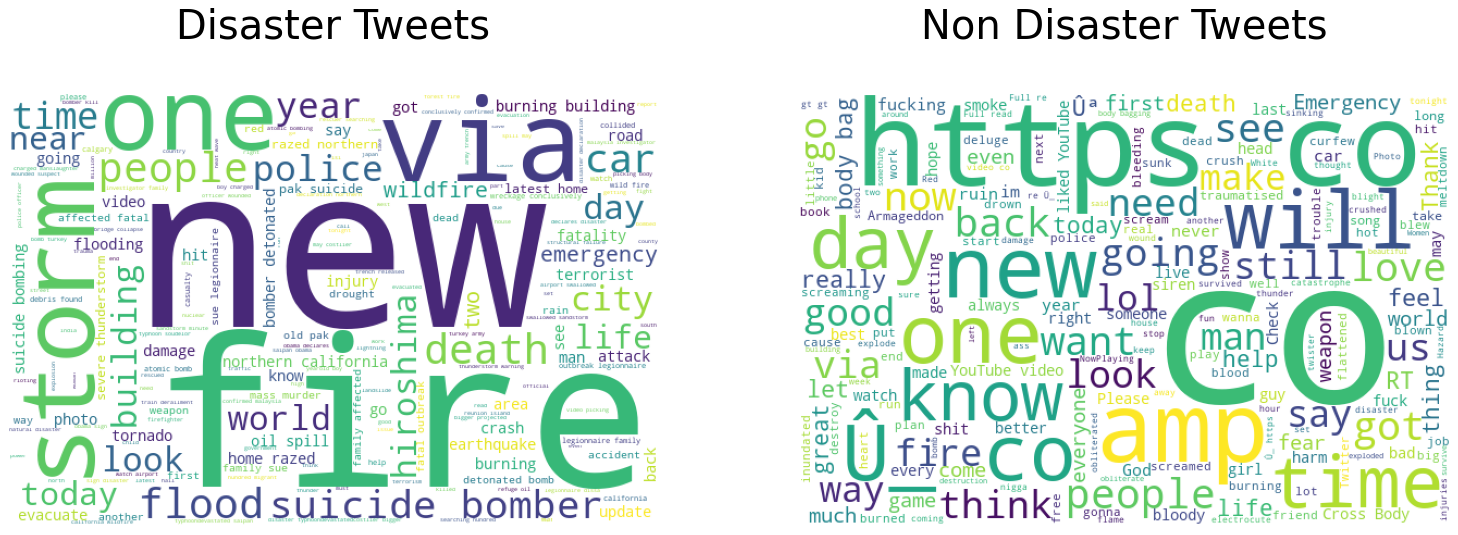

In [ ]:
#quels sont les mots les plus dominents dans les tweets (juste pour le fun ... les images sont toujour cool a voir)

from wordcloud import WordCloud

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets\n',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(non_disaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets\n',fontsize=40);

In [ ]:
print(dataframe_tweets.shape)

(7613, 5)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

print(f'Début de l\'encodafe des données ... sous format TF-IDF: ')
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, 
                        ngram_range=(1, 2),
                        stop_words='english')

# Transformation en vecteur
features = tfidf.fit_transform(dataframe_tweets.text).toarray()
print('Encodage terminé')

X = features # Collection of documents
y = dataframe_tweets['target']

features

Début de l'encodafe des données ... sous format TF-IDF: 
Encodage terminé


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


# Split the data
print(f'Début du split du dataset ...')
X_train,X_test,Y_train,Y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(f'Split terminé : ')

print(f'\t Ensemble d\'entrainement  = 70% : ')
print(f'\t Ensemble de test  = 30% : ')

#On définie le modèle LR
model = LogisticRegression(random_state=1)
#model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

#entrainnement de notre modèle
model.fit(X_train, Y_train)

#valeur à prédir 
val_predictions = model.predict(X_test)

print('\nTrain/Test split results:')
print(model.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_test, val_predictions))

#Erreur de prédiction pour les tweets (moyenne de toutes les erreurs)
print('\nMean Absolute Error (MAE) is ',mean_absolute_error(Y_test, val_predictions)) 

scores = cross_val_score(model, X_train, Y_train, cv=10)
print('\nCross-Validation Accuracy Scores', scores)

#Afficher la valeur min - moyenne - max de la cross validation
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

#nos prédictions sont erronées d'environ 0.20359019264448336

Début du split du dataset ...
Split terminé : 
	 Ensemble d'entrainement  = 70% : 
	 Ensemble de test  = 30% : 

Train/Test split results:
LogisticRegression accuracy is 0.796

Mean Absolute Error (MAE) is  0.20359019264448336

Cross-Validation Accuracy Scores [0.77673546 0.79362101 0.7804878  0.79362101 0.81050657 0.82363977
 0.81613508 0.7804878  0.81425891 0.78571429]


(0.776735459662289, 0.7975207719110158, 0.8236397748592871)